In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

Get fitting results - first absorber redshifts

In [3]:
z_list = [0.67, 0.72, 1.09, 1.16, 1.27, 1.04]

In [4]:
z_color_dict = {0.67: 'salmon', 
                0.72: 'olivedrab', 
                1.09: 'mediumslateblue', 
                1.16: 'slategray', 
                1.27: 'tan',
                1.04: 'brown'}

Get equivalent width results for each component

In [5]:
z_0_67 = {'CIII 977': ['242, -8, 8', 1],
'CIV 1548': ['159, -18, 18', 1],
'OIII 702': ['95, -6, 6', 1],
'OIV 787': ['197, -5, 5', 1]}

In [6]:
z_0_72 = {'CIII 977' : ['73, -6, 6', 1],
'OIV 787' :['104, -4, 4', 1]}

In [7]:
z_1_09 = {'HI 1215': ['364, -15, 15',2], # Saturated, but one component only has upper limit
'CIII 977': ['246, -33, 33',1], # Only one component is simultaneously fitted, but also looks saturated
'CIV 1548': ['199, -3, 3',1],
'NIV 765': ['22, -8, 8',1], # Only one component is simultaneously fitted, not a high significance detection?
'OIII 702': ['77, -3, 3',1],
'OIV 787': ['134, -6, 6',2]}

In [8]:
z_1_16 = {'HI 1215': ['551, -17, 17', 2],
'CIII 977': ['143, -26, 26', 1], # Only one component is simultaneously fitted, but also looks saturated
'CIV 1548': ['120, -4, 4', 2],
'OIII 702': ['54, -6, 6', 1], # Only one component is simultaneously fitted, but also looks saturated
'OIV 787': ['108, -8, 8', 2]}

In [9]:
z_1_27 = {'HI 1215' : ['516, -14, 14', 3],
'CIII 977' : ['46, -14, 14', 1], # Only one component is simultaneously fitted, but also looks saturated
'CIV 1548' : ['176, -3, 3', 2],
'NIV 765': ['20, -8, 8',1],
'OIII 702' : ['28, -6, 6', 1]} # Only one component is simultaneously fitted

In [10]:
z_1_04 = {'HI 1215': ['696, -16, 16', 4], # Two components have upper limits
'CIII 977': ['201, -32, 32', 3],
'CIV 1548': ['342, -7, 7', 4],
'NIV 765': ['94, -7, 7', 4],
'OIII 702': ['99, -3, 3', 4],
'OIV 787': ['208, -10, 10', 4]}

Compile all dictionaries into one

In [11]:
EW_dict = {0.67: z_0_67, 0.72: z_0_72, 1.09: z_1_09, 1.16: z_1_16, 1.27: z_1_27, 1.04: z_1_04}

Write some functions to process data strings

In [12]:
def process_data_str(s, non_det_err):
    
    # Check if the point should be plotted or not
    bool_plot = False
    # Coordinate value
    coord_value = np.nan
    # Lower error
    err_lo = 0
    # Upper error
    err_hi = 0
    # Boolean for upper limit
    uplim = False
    # Boolean for lower limit
    lolim = False
    
    # If we don't have an empty string 
    if len(s)!=0:
        
        # Then it needs to be plotted
        bool_plot = True
        
        # Now, check for a non-detection first
        
        # Upper limit
        if s[0] == '<':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only lower error
            uplim = True
            err_lo = non_det_err
            
        # Lower limit
        elif s[0] == '>':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only upper error
            lolim = True
            err_hi = non_det_err
            
        # Detection
        else:
            s_arr = np.array(s.split(','), dtype=float)
            
            # Errors not provided
            if len(s_arr) == 1:
                coord_value = s_arr[0]
                err_lo = 0
                err_hi = 0
                
            # Errors provided
            else:
                coord_value = s_arr[0]
                err_lo = -s_arr[1] # Negative sign to flip the already present negative sign
                err_hi = s_arr[2]
        
    return bool_plot, coord_value, err_lo, err_hi, uplim, lolim

In [13]:
def plot_data_strings(ax, s_x, s_y, c, m, mfc='', non_det_err=5):
    
    # First process each data string
    bool_plot_x, coord_value_x, err_lo_x, err_hi_x, uplim_x, lolim_x = process_data_str(s_x, non_det_err)
    bool_plot_y, coord_value_y, err_lo_y, err_hi_y, uplim_y, lolim_y = process_data_str(s_y, non_det_err)

    
    if mfc == '':
        mfc = c
    
    ax.errorbar(x=coord_value_x, y=coord_value_y,
                xerr=[[err_lo_x], [err_hi_x]],
                yerr=[[err_lo_y], [err_hi_y]], 
                color=c, linestyle='none',
                marker=m, markersize=8, capsize=4, elinewidth=0.7, 
                xuplims = uplim_x, xlolims= lolim_x,
                uplims = uplim_y, lolims= lolim_y, markerfacecolor=mfc) 

Now make plots

In [14]:
def n_W_plot(ax, ion_transition, z_list, EW_dict, z_color_dict):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        EW_z_dict = EW_dict[z]
        
        if ion_transition in list(EW_z_dict.keys()):
            ion_transition_val = EW_z_dict[ion_transition]
            
            n_str = str(ion_transition_val[1])
            W_str = ion_transition_val[0]

            c = 'black'
            m = 'o'

            #if z == 0.67 and ion_transition == 'CIV 1548':
            #    mfc = 'none'
            #else:
            #    mfc = 'black'
            
            mfc = 'black'
            plot_data_strings(ax, n_str, W_str, c, m, mfc)

In [15]:
plot_ion_transitions = ['HI 1215', 
                        'CIII 977','CIV 1548', 'NIV 765',
                        'OIII 702',  'OIV 787']

In [16]:
ion_label_y = [390, 100, 150, 20, 30, 110]

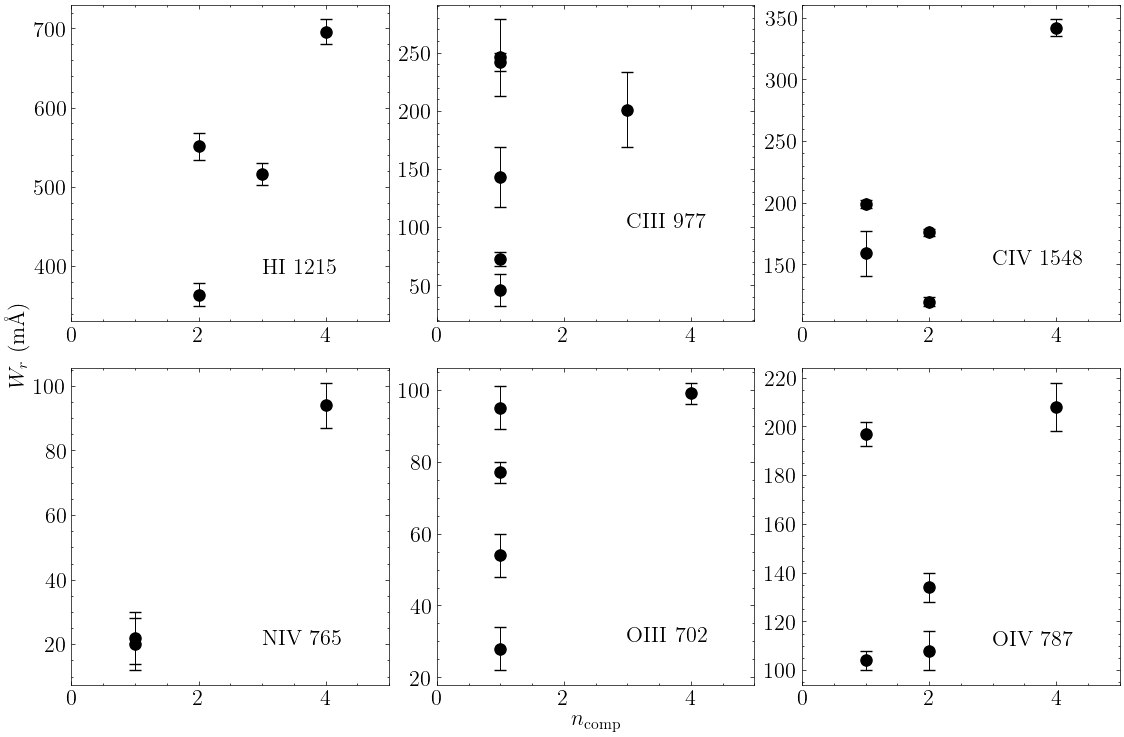

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(3*4, 2*4))

for i in range(len(plot_ion_transitions)):
    
    ax = axes[i//3, i%3]
    s = plot_ion_transitions[i]
    
    n_W_plot(ax, s, z_list, EW_dict, z_color_dict)
    ax.text(x=3, y=ion_label_y[i], s=s, fontsize=16)
    ax.set_xlim(0, 5)
    
#plt.subplots_adjust(wspace=0, hspace=0)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$n_{\mathrm{comp}}$', labelpad=20)
ax_label.set_ylabel(r'$W_r$ (mÅ)', labelpad=30) # Use argument `labelpad` to move label downwards.

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.15)


        
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/W_vs_n_comp.pdf', dpi=300)